In [1]:
%matplotlib inline
import scipy.linalg as splin
import numpy as np
import matplotlib.pyplot as plt
import math
import bisect
import random
import pickle
from mpl_toolkits.mplot3d import proj3d

In [2]:
def plot3D(px,py,pz,clist,emphPoints = [],cmap='plasma',shadow=False,useCMAP = True,xLabel='',yLabel='',zLabel='',savefig='',saveN = 1):
    
    elev = 30
    azim = 60

    viewVect = [np.cos(np.pi*180/elev)*np.sin(np.pi*180/azim),np.cos(np.pi*180/elev)*np.cos(np.pi*180/azim),np.cos(np.pi*180/elev)]
    
    thetalist = np.linspace(0,2*np.pi,saveN + 1)
    thetalist = thetalist[:-1]
    
    projMat = np.array([px,py])
    
    for idx in range(saveN):
        theta = thetalist[idx]
        rotMat = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
        
        rotx,roty = np.dot(rotMat,projMat)
        rotz = pz
        clistRot = clist
        
        p = np.array([rotx,roty,rotz])
        dots = np.array(np.dot(viewVect,p))
        sort = dots.argsort()

        fig = plt.figure(figsize = (10,10))
        ax = fig.gca(projection='3d')

        Xdist = px.max() - px.min()
        Xcntr = (px.max() + px.min())/2.0
        Ydist = py.max() - py.min()
        Ycntr = (py.max() + py.min())/2.0
        Zdist = pz.max() - pz.min()
        Zcntr = (pz.max() + pz.min())/2.0

        dist = 0.55*max(Xdist,Ydist,Zdist)

        for p in emphPoints:
            ax.scatter([rotx[p]],[roty[p]],[rotz[p]],c='C1',s=200)
            if shadow:
                ax.scatter([rotx[p]],[roty[p]],[Zcntr - dist],c='black',alpha=0.5)
                ax.scatter([rotx[p]],[Ycntr + dist],[rotz[p]],c='black',alpha=0.5)
                ax.scatter([Xcntr - dist],[roty[p]],[rotz[p]],c='black',alpha=0.5)
        
        rotx = rotx[sort]
        roty = roty[sort]
        rotz = rotz[sort]
        clistRot = np.array(clistRot)[sort]
        
        if useCMAP:
            ax.scatter(rotx,roty,rotz,c=clistRot,s=100,edgecolor='black',linewidth=0.1,cmap = cmap)
        else:
            ax.scatter(rotx,roty,rotz,c=clistRot,s=100,edgecolor='black',linewidth=0.1)


        ax.set_xlim([Xcntr - dist, Xcntr + dist])
        ax.set_ylim([Ycntr - dist, Ycntr + dist])
        ax.set_zlim([Zcntr - dist, Zcntr + dist])

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

        #ax.set_axis_off()
        #plt.show()

        if shadow:
            #fig = plt.figure(figsize = (10,10))
            #ax = fig.gca(projection='3d')
            #ax.view_init(30,-60)

            ax.scatter(rotx,roty,[Zcntr - dist for p in rotz],c='black',alpha=0.01)
            ax.scatter(rotx,[Ycntr + dist for p in roty],rotz,c='black',alpha=0.01)
            ax.scatter([Xcntr - dist for p in rotx],roty,rotz,c='black',alpha=0.01)

            ax.set_xlim([Xcntr - dist, Xcntr + dist])
            ax.set_ylim([Ycntr - dist, Ycntr + dist])
            ax.set_zlim([Zcntr - dist, Zcntr + dist])

            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_zticks([])

            #ax.set_axis_off()
        ax.set_xlabel(xLabel,fontsize=25)
        ax.set_ylabel(yLabel,fontsize=25)
        ax.set_zlabel(zLabel,fontsize=25)

        if savefig == '':
            plt.show()
        else:
            plt.savefig(savefig+str(idx)+'.png')
            plt.close()


In [3]:
probs = np.linspace(0,1,2001)[1:-1]

In [4]:
idx = math.floor(len(probs)/2)

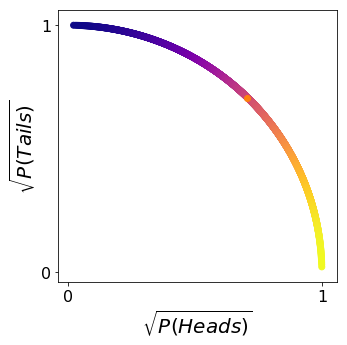

In [5]:
plt.figure(figsize=(5,5))

plt.scatter(np.sqrt(probs),np.sqrt(1-probs),c=probs,cmap='plasma')

plt.scatter([np.sqrt(probs[idx])],[np.sqrt(1-probs[idx])],c='C1')

plt.xlabel(r'$\sqrt{P(Heads)}$',fontsize=20)
plt.ylabel(r'$\sqrt{P(Tails)}$',fontsize=20)

plt.xticks([0,1],fontsize=16)
plt.yticks([0,1],fontsize=16)

#plt.title('Rigged Coin Toss',fontsize=16)

plt.show()

In [6]:
DDT = [[-4*np.log(np.cos(np.arccos(np.sqrt(p1)) - np.arccos(np.sqrt(p2)))) for p1 in probs] for p2 in probs]
sums = [sum(row)/len(probs) for row in DDT]
sum_sums = sum(sums)/len(probs)

CC = [[DDT[i][j] - sums[i] - sums[j] + sum_sums for i in range(len(DDT))] for j in range(len(DDT))]

In [7]:
w,v = np.linalg.eig(CC)

In [8]:
proj = np.dot(v,np.diag(np.sqrt(abs(w)))).real

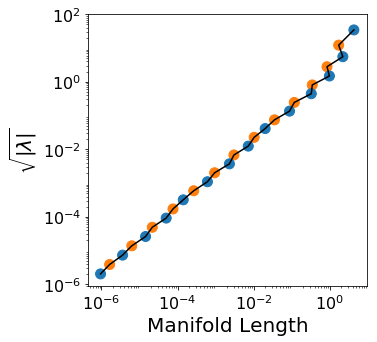

In [9]:
plt.figure(figsize=(5,5))
distances = np.array([max(proj[:,i])-min(proj[:,i]) for i in range(len(w))])
selection = [i for i in range(0,27)]
y = distances[selection]
x = np.sqrt(abs(w).real[selection])
plt.plot(y,x,color='black')
#plt.plot([min(x),max(x)],[min(x),max(x)],linestyle='--',c='black',alpha=0.5)
colors = []
for eig in w.real[selection]:
    if eig < 0:
        colors.append('C0')
    else:
        colors.append('C1')
plt.scatter(y,x,c=colors,s=100)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\sqrt{|\lambda|}$',fontsize=20)
plt.xlabel('Manifold Length',fontsize=20)

plt.xticks([10**i for i in [0,-2,-4,-6]],fontsize=16)
plt.yticks([10**i for i in [2,0,-2,-4,-6]],fontsize=16)

plt.show()

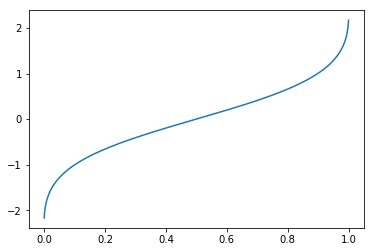

In [10]:
plt.plot(probs,proj[:,0])
plt.show()

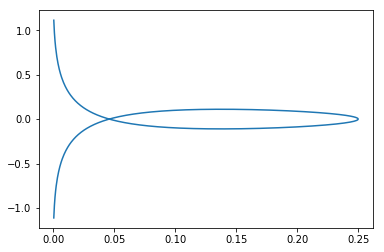

In [11]:
plt.plot(probs*(1-probs),proj[:,2])
plt.show()

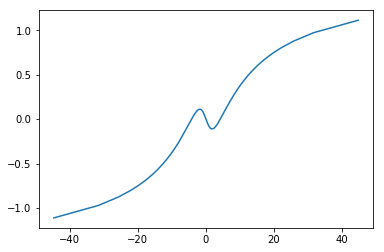

In [12]:
plt.plot([(1-2*p)/np.sqrt(p*(1-p)) for p in probs],proj[:,2])
plt.show()

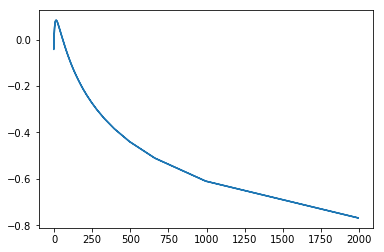

In [13]:
plt.plot([(1-6*p*(1-p))/(p*(1-p)) for p in probs],proj[:,3])
plt.show()

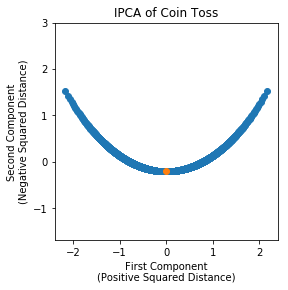

In [14]:
plt.figure(figsize=(4,4))
x = proj[:,0]
y = proj[:,1]
plt.scatter(x,y)

plt.scatter([x[idx]],[y[idx]],c='C1')
plt.axes().set_aspect('equal', 'datalim')

plt.xlabel('First Component\n(Positive Squared Distance)')
plt.ylabel('Second Component\n(Negative Squared Distance)')

plt.title('IPCA of Coin Toss')

plt.show()

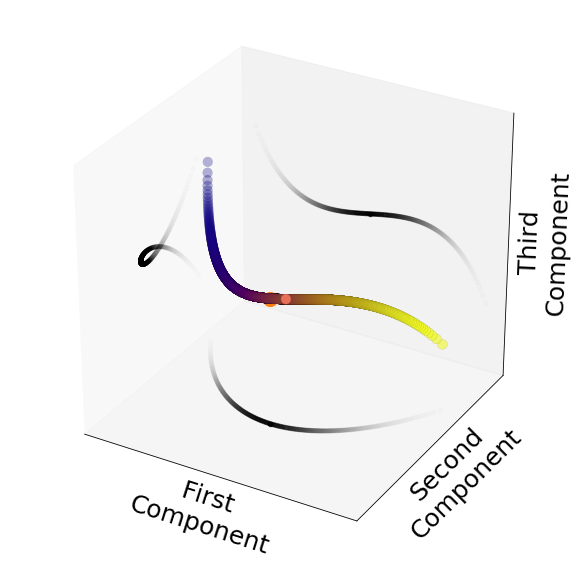

In [15]:
px = proj[:,0]
py = proj[:,1]
pz = proj[:,2]

clist = probs

plot3D(px,py,pz,clist,emphPoints=[idx],shadow=True,xLabel='First\nComponent',yLabel='Second\nComponent',zLabel='Third\nComponent')

In [16]:
imCols = []
reCols = []
for i in range(len(w)):
    if w[i].real < 0:
        imCols.append(i)
    else:
        reCols.append(i)

In [17]:
fairProj = proj[idx]

In [18]:
dr2 = []
di2 = []
for p in proj:
    ddif2 = (fairProj - p)**2
    dr2_temp = sum([ddif2[x] for x in imCols])
    di2_temp = sum([ddif2[x] for x in reCols])
    dr2.append(dr2_temp)
    di2.append(di2_temp)
dr2 = np.array(dr2)
di2 = np.array(di2)

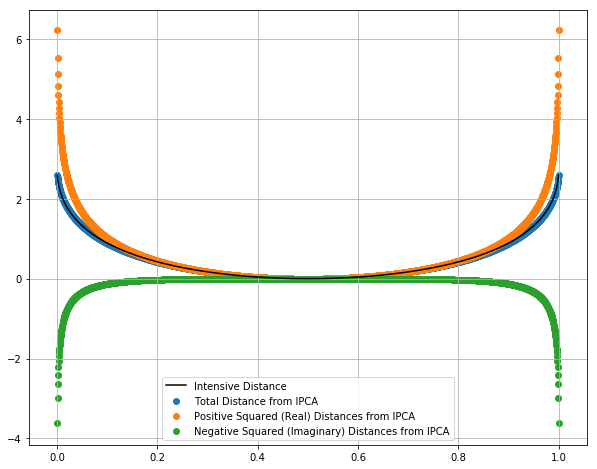

In [19]:
plt.figure(figsize=(10,8))
plt.plot(probs,[-8*np.log(np.cos(np.arccos(np.sqrt(probs[idx])) - np.arccos(np.sqrt(p)))) for p in probs],c='black',label = 'Intensive Distance')
plt.scatter(probs,dr2-di2, label = 'Total Distance from IPCA')
plt.scatter(probs,dr2,label='Positive Squared (Real) Distances from IPCA')
plt.scatter(probs,-di2,label = 'Negative Squared (Imaginary) Distances from IPCA')

plt.grid()
plt.legend()
plt.show()

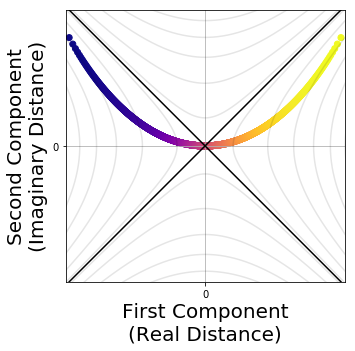

In [20]:
x = proj[:,0] - proj[idx][0]
y = proj[:,1]-proj[idx][1]
plt.figure(figsize=(5,5))
plt.scatter(x,y,c=probs,cmap='plasma')

ConstList = [0.2,1,2,3,4,5,6,7,8]
plt.plot(x,abs(x),c='black')
plt.plot(x,-abs(x),c='black')
for c in ConstList:
    plt.plot(x,np.sqrt(c+x**2),c='black',alpha=0.1)
    plt.plot(x,-np.sqrt(c+x**2),c='black',alpha=0.1)
    plt.plot(np.sqrt(c+x**2),x,c='black',alpha=0.1)
    plt.plot(-np.sqrt(c+x**2),x,c='black',alpha=0.1)
plt.xlabel('First Component\n(Real Distance)',fontsize=20)
plt.ylabel('Second Component\n(Imaginary Distance)',fontsize=20)
plt.xticks([0])
plt.yticks([0])
plt.grid()
plt.ylim([min(x),max(x)])
plt.xlim([min(x),max(x)])
plt.axes().set_aspect('equal', 'datalim')
plt.show()

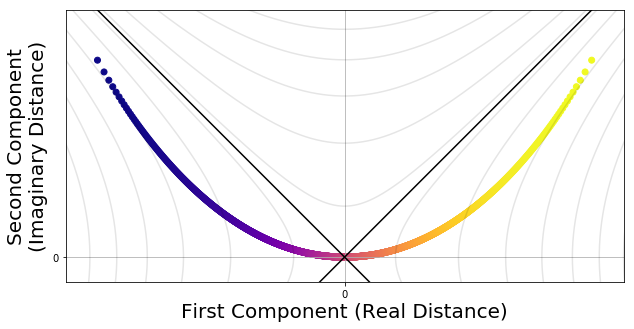

In [25]:
x = proj[:,0] - proj[idx][0]
y = proj[:,1]-proj[idx][1]
plt.figure(figsize=(10,5))
plt.scatter(x,y,c=probs,cmap='plasma')

ConstList = [0.2,1,2,3,4,5,6,7,8]
plt.plot(x,abs(x),c='black')
plt.plot(x,-abs(x),c='black')
for c in ConstList:
    plt.plot(x,np.sqrt(c+x**2),c='black',alpha=0.1)
    plt.plot(x,-np.sqrt(c+x**2),c='black',alpha=0.1)
    plt.plot(np.sqrt(c+x**2),x,c='black',alpha=0.1)
    plt.plot(-np.sqrt(c+x**2),x,c='black',alpha=0.1)
plt.xlabel('First Component (Real Distance)',fontsize=20)
plt.ylabel('Second Component\n(Imaginary Distance)',fontsize=20)
plt.xticks([0])
plt.yticks([0])
plt.grid()
plt.ylim([-max(x)*0.1,max(x)])
plt.xlim([min(x),max(x)])
plt.axes().set_aspect('equal', 'datalim')
plt.show()

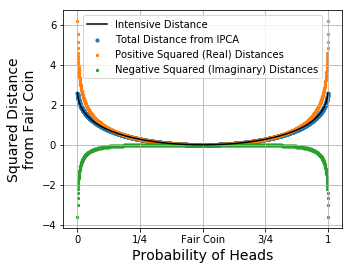

In [17]:
plt.figure(figsize=(5,4))
plt.plot(probs,[-8*np.log(np.cos(np.arccos(np.sqrt(probs[idx])) - np.arccos(np.sqrt(p)))) for p in probs],c='black',label = 'Intensive Distance')
plt.scatter(probs,dr2-di2, label = 'Total Distance from IPCA',s=10)
plt.scatter(probs,dr2,label='Positive Squared (Real) Distances',s=5)
plt.scatter(probs,-di2,label = 'Negative Squared (Imaginary) Distances',s=5)

plt.xlabel('Probability of Heads',fontsize=14)
plt.ylabel('Squared Distance\nfrom Fair Coin',fontsize=14)

#plt.ylim([-5,5])

plt.xticks([0,0.25,0.5,0.75,1],['0','1/4','Fair Coin','3/4','1'])

plt.grid()
plt.legend(loc='upper center')
plt.show()